Ritwesh Kumar

# 2.1 Images


In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import Subset
import random

# Define transform
transform = transforms.ToTensor()

# Download MNIST dataset
mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Select 1,000 random samples
subset_indices = random.sample(range(len(mnist_dataset)), 1000)
mnist_subset = Subset(mnist_dataset, subset_indices)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 353kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.36MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



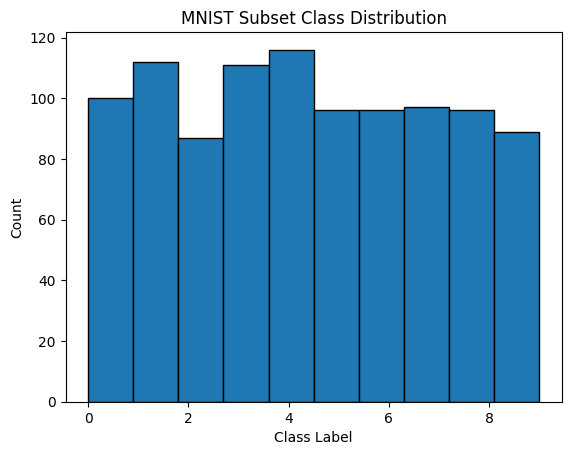

In [2]:
labels = torch.tensor([mnist_subset[i][1] for i in range(len(mnist_subset))])

# Plot histogram
plt.hist(labels.numpy(), bins=10, edgecolor='black')
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("MNIST Subset Class Distribution")
plt.show()

In [3]:
from einops import rearrange

# Extract images and labels
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # Shape: (1000, 1, 28, 28)

# Determine batch size
batch_size = 25
num_batches = images.shape[0] // batch_size

# Batch images using einops
batched_images = rearrange(images, '(n b) c h w -> n b c h w', n=num_batches, b=batch_size)

# Print batched images shape
print("Batched images shape:", batched_images.shape)

Batched images shape: torch.Size([40, 25, 1, 28, 28])


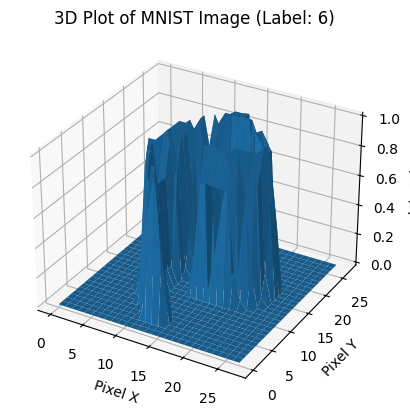

In [4]:
import numpy as np

# Randomly select an image
random_idx = random.randint(0, len(mnist_subset) - 1)
image, label = mnist_subset[random_idx]

# Convert to numpy
image_np = image.squeeze().numpy()  # Shape (28,28)

# Create a grid for x and y coordinates
x = np.arange(0, image_np.shape[1])
y = np.arange(0, image_np.shape[0])
X, Y = np.meshgrid(x, y)

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, image_np)

# Set labels
ax.set_xlabel("Pixel X")
ax.set_ylabel("Pixel Y")
ax.set_zlabel("Intensity")
ax.set_title(f"3D Plot of MNIST Image (Label: {label})")

plt.show()

# 2.2 Time Series

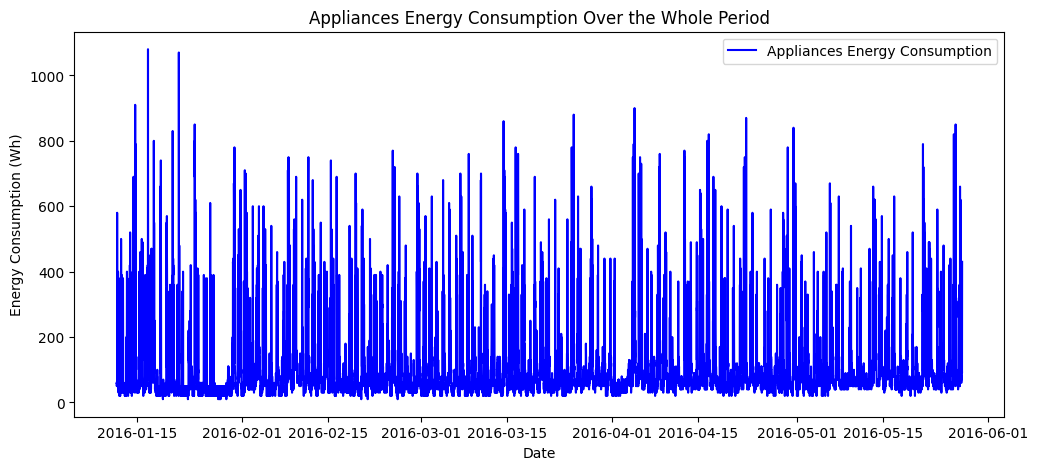

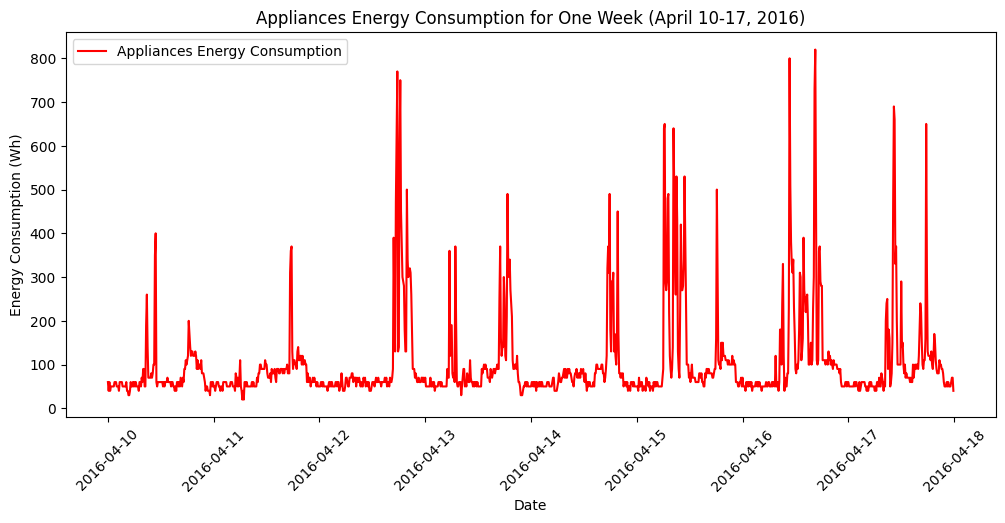

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/refs/heads/master/energydata_complete.csv"
df = pd.read_csv(url)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Plot entire dataset
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Appliances'], label='Appliances Energy Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption Over the Whole Period')
plt.legend()
plt.show()

# Zoom into a specific week (e.g., April 10–17, 2016)
week_data = df.loc['2016-04-10':'2016-04-17']

# Plot weekly data
plt.figure(figsize=(12, 5))
plt.plot(week_data.index, week_data['Appliances'], label='Appliances Energy Consumption', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for One Week (April 10-17, 2016)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-5f7e11d6f6b8>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = week_data['Appliances'].resample('H').sum().reset_index()


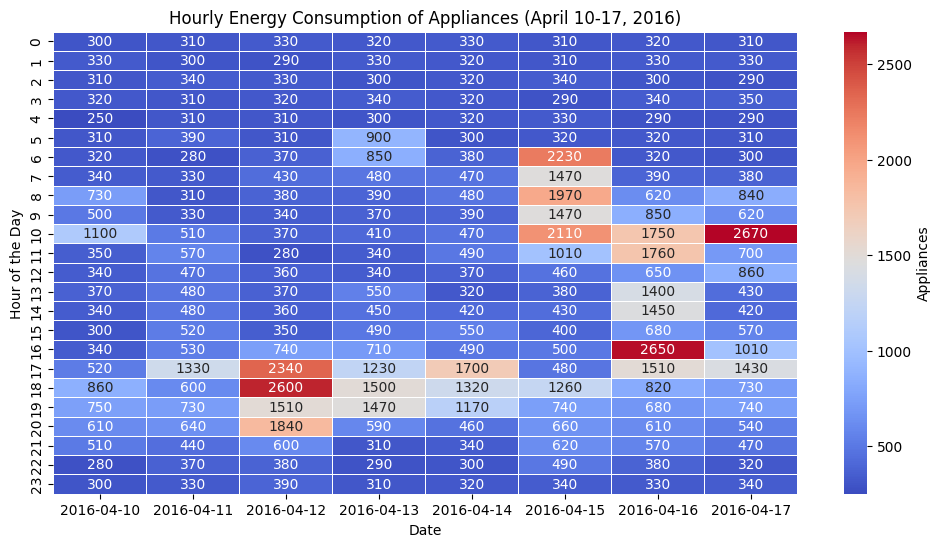

In [8]:
import seaborn as sns

# Resample data to hourly frequency
hourly_data = week_data['Appliances'].resample('H').sum().reset_index()

# Extract day and hour information
hourly_data['Day'] = hourly_data['date'].dt.strftime('%Y-%m-%d')
hourly_data['Hour'] = hourly_data['date'].dt.hour

# Pivot table for heatmap (Hours as rows, Days as columns)
pivot_table = hourly_data.pivot(index='Hour', columns='Day', values='Appliances')

# Plot heatmap with color bar label
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5,
            cbar_kws={'label': 'Appliances'})

plt.xlabel("Date")
plt.ylabel("Hour of the Day")
plt.title("Hourly Energy Consumption of Appliances (April 10-17, 2016)")
plt.show()


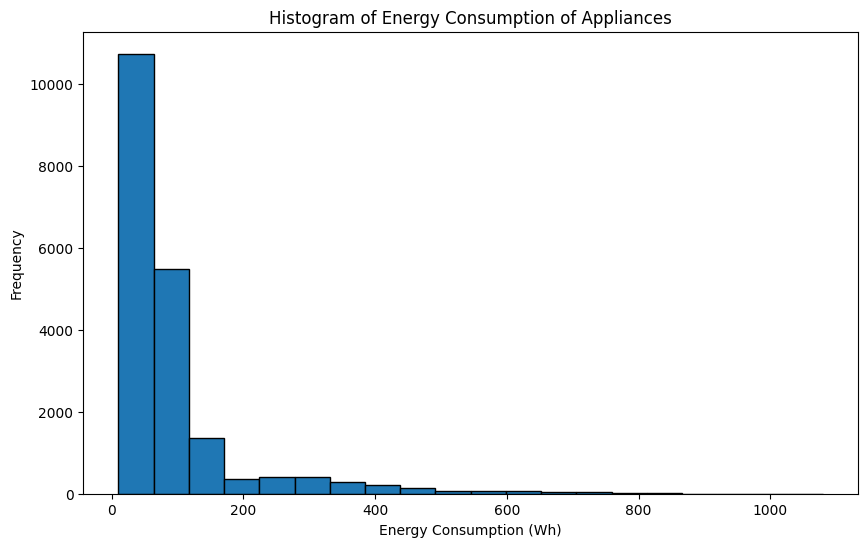

In [9]:
# Plot histogram of appliance energy consumption
plt.figure(figsize=(10, 6))
plt.hist(df['Appliances'], bins=20, edgecolor='black')
plt.title('Histogram of Energy Consumption of Appliances')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

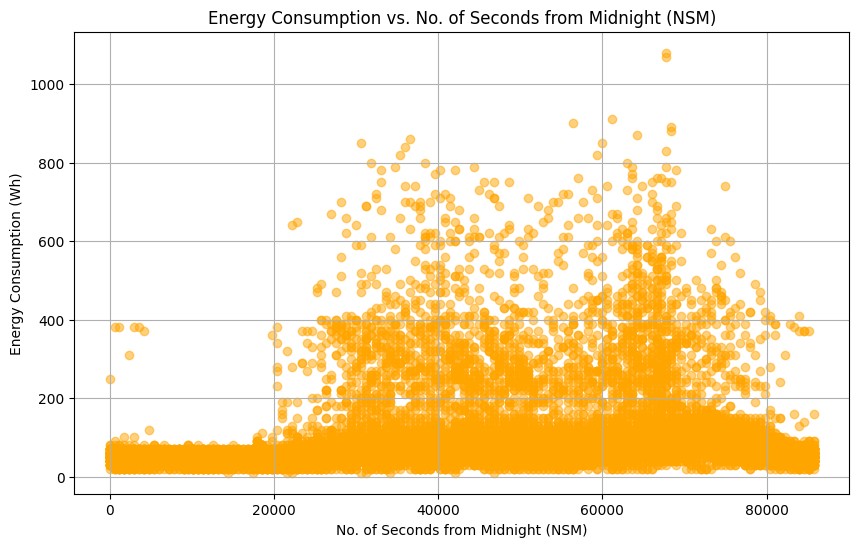

In [10]:
# Reset the index to make 'date' a column again:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])

# Calculate NSM (No. of Seconds from Midnight)
df['NSM'] = (df['date'].dt.hour * 3600) + (df['date'].dt.minute * 60) + df['date'].dt.second

# Plot energy consumption vs NSM
plt.figure(figsize=(10, 6))
plt.scatter(df['NSM'], df['Appliances'], color='orange', alpha=0.5)
plt.title('Energy Consumption vs. No. of Seconds from Midnight (NSM)')
plt.xlabel('No. of Seconds from Midnight (NSM)')
plt.ylabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()

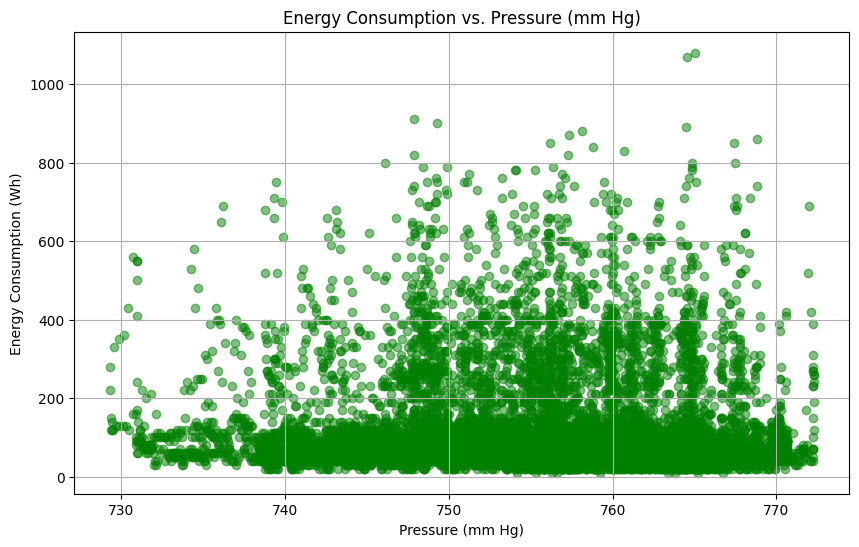

In [11]:
# Plot energy consumption vs Pressure (mm Hg)
plt.figure(figsize=(10, 6))
plt.scatter(df['Press_mm_hg'], df['Appliances'], color='green', alpha=0.5)
plt.title('Energy Consumption vs. Pressure (mm Hg)')
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.grid(True)
plt.show()

# Relationship between energy consumption and pressure in mm Hg and number of seconds from midnight

The energy consumption versus number of seconds from midnight plot shows that the energy consumption is above about 400 Wh between 20,000 and 80,000 seconds from midnight which is about from 5:30 am to 10 pm. This implies that there is more energy consumed during throughout the day from morning to night while people are awake and there is less energy consumed during the night when people are asleep. In addition, the peak energy consumption is close to 800 Wh and is between 30,000 and 45,000 seconds from midnight and 60,000 to about 65,000 seconds from midnight; these times correspond to about 8:20 am to 12:30 pm and 4:40 pm to 6 pm. This implies that the peak energy is consumed during a typical working hours of 8 am to 1 pm as well as after work hours between about 5 pm to 6 pm when the Sun starts to set and it becomes darker outside.

As pressure in mm Hg increases, the energy consumption rises as well up to a point in pressure, around 768 mm Hg, before decreasing. This implies that as the weather pressure rises between about 730 to 770 mm Hg, the energy consumed rises as well up to a point before decreasing at around 768 mm Hg.

# 2.3 Multi-variate

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
df = pd.read_csv('airfoil_self_noise.dat', sep="\t", header=None)

# Assigning column names based on the problem description
columns = [
    "Frequency (Hz)", "Angle of Attack (deg)", "Chord Length (m)",
    "Free-stream Velocity (m/s)", "Suction Side Velocity (m/s)", "Scaled Sound Pressure Level (dB)"
]

df.columns = columns

# Compute Mean of the data statistics
mean_values = df.mean()

# Display the mean values
print("Mean of each feature:")
print(mean_values)

Mean of each feature:
Frequency (Hz)                      2886.380572
Angle of Attack (deg)                  6.782302
Chord Length (m)                       0.136548
Free-stream Velocity (m/s)            50.860745
Suction Side Velocity (m/s)            0.011140
Scaled Sound Pressure Level (dB)     124.835943
dtype: float64


In [16]:
# Compute the variance of the data statistics
variance_values = df.var()

# Display the variance values
print("Variance of each feature:")
print(variance_values)

Variance of each feature:
Frequency (Hz)                      9.938717e+06
Angle of Attack (deg)               3.502424e+01
Chord Length (m)                    8.749868e-03
Free-stream Velocity (m/s)          2.425116e+02
Suction Side Velocity (m/s)         1.729287e-04
Scaled Sound Pressure Level (dB)    4.759146e+01
dtype: float64


In [17]:
# Compute the median of the data statistics
median_values = df.median()

# Display the median values
print("Median of each feature:")
print(median_values)

Median of each feature:
Frequency (Hz)                      1600.000000
Angle of Attack (deg)                  5.400000
Chord Length (m)                       0.101600
Free-stream Velocity (m/s)            39.600000
Suction Side Velocity (m/s)            0.004957
Scaled Sound Pressure Level (dB)     125.721000
dtype: float64


In [18]:
# Compute the kurtosis of the data statistics
kurtosis_values = df.kurtosis()

# Display the kurtosis values
print("Kurtosis of each feature:")
print(kurtosis_values)

Kurtosis of each feature:
Frequency (Hz)                      5.708685
Angle of Attack (deg)              -0.412951
Chord Length (m)                   -1.037964
Free-stream Velocity (m/s)         -1.563951
Suction Side Velocity (m/s)         2.218903
Scaled Sound Pressure Level (dB)   -0.314187
dtype: float64


In [19]:
# Compute the skewness of the data statistics
skewness_values = df.skew()

# Display the skewness values
print("Skewness of each feature:")
print(skewness_values)

Skewness of each feature:
Frequency (Hz)                      2.137084
Angle of Attack (deg)               0.689164
Chord Length (m)                    0.457457
Free-stream Velocity (m/s)          0.235852
Suction Side Velocity (m/s)         1.702165
Scaled Sound Pressure Level (dB)   -0.418952
dtype: float64


In [20]:
# Compute the range of the data statistics
range_values = df.max() - df.min()

# Display the range values
print("Range of each feature:")
print(range_values)

Range of each feature:
Frequency (Hz)                      19800.000000
Angle of Attack (deg)                  22.200000
Chord Length (m)                        0.279400
Free-stream Velocity (m/s)             39.600000
Suction Side Velocity (m/s)             0.058011
Scaled Sound Pressure Level (dB)       37.607000
dtype: float64
